In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler


In [28]:
font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = matplotlib.font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rc('font',family= font_name)

In [4]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis=1, inplace=False)

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [8]:
dt_model = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth=4, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [9]:
rf_model = RandomForestRegressor(random_state=123, n_estimators=100, min_samples_leaf=14,
                                min_samples_split=34, max_depth=5)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=34,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [10]:
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=16,
                                    min_samples_split=54, max_depth=5, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=16,
             min_samples_split=54, min_weight_fraction_leaf=0.0,
             n_estimators=30, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=123)

In [17]:
svr_model = SVR(C=10, gamma=0.03, epsilon=0.5)
svr_model.fit(df_scaled_train_x, df_train_y)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
models = ["의사결정나무", "랜덤포레스트", "그래디언트 부스팅", "서포트벡터머신"]
mse, mae = [], []

In [19]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))

In [22]:
rf_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))

In [23]:
gb_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))

In [24]:
sv_y_pred = svr_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, sv_y_pred))
mae.append(mean_absolute_error(df_test_y, sv_y_pred))

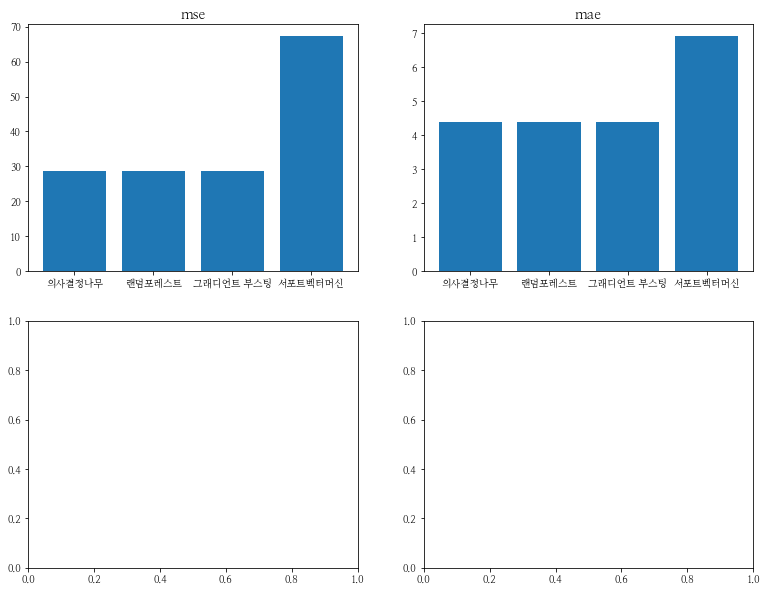

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)
ax[0,1].bar(models, mae)
ax[0,1].set_title('mae').set_fontsize(15)